In [80]:
# Import Libraries and Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [81]:
# Read the lyft_Dec_23.parquet file into a DataFrame.
lyft_df = pd.read_parquet("lyft_Dec_23.parquet")

# Display the first 5 rows of the DataFrame.
lyft_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:00:00,2023-12-01 00:25:06,130,216,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
1,2023-12-01 00:00:00,2023-12-01 00:25:31,170,61,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2,2023-12-01 00:00:00,2023-12-01 01:05:08,158,265,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
3,2023-12-01 00:00:01,2023-12-01 00:19:44,238,185,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
4,2023-12-01 00:00:01,2023-12-01 00:22:25,216,61,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


In [82]:
lyft_df.set_index("pickup_datetime", inplace=True, drop=False)  
lyft_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:25:06,130,216,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:25:31,170,61,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 01:05:08,158,265,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
2023-12-01 00:00:01,2023-12-01 00:00:01,2023-12-01 00:19:44,238,185,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
2023-12-01 00:00:01,2023-12-01 00:00:01,2023-12-01 00:22:25,216,61,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


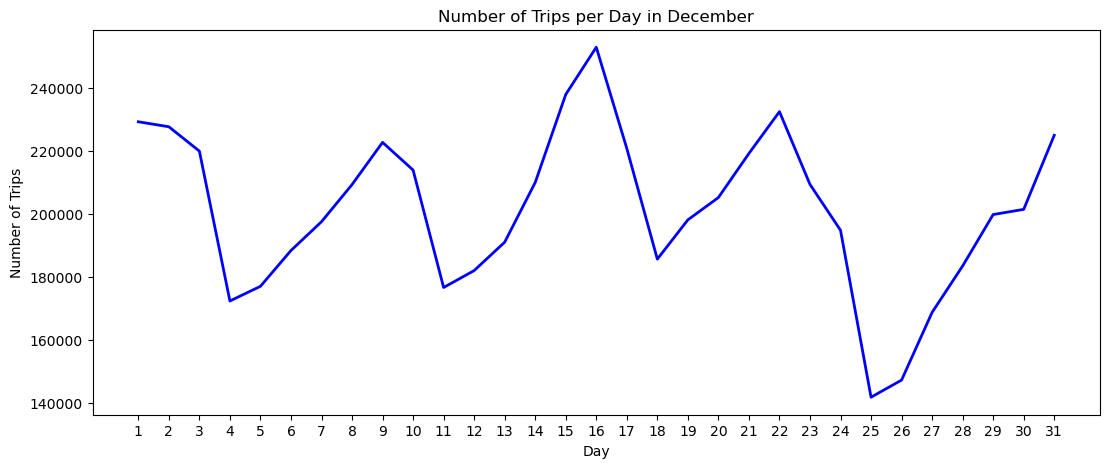

In [117]:
lyft_df["DOLocationID"].groupby(lyft_df.index.day).count().plot(figsize=(13, 5), color="blue", linewidth=2)
plt.title("Number of Trips per Day in December")
plt.xlabel("Day")
plt.xticks(np.arange(1, 32, 1))
plt.ylabel("Number of Trips")
plt.show()

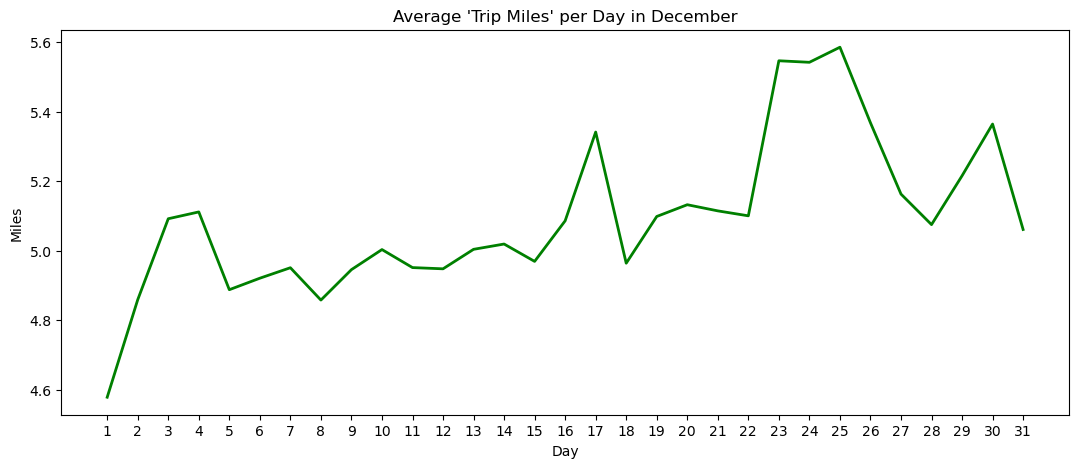

In [107]:
lyft_df.groupby(lyft_df.index.day)["trip_miles"].mean().plot(figsize=(13, 5), color="green", linewidth=2)
plt.title("Average 'Trip Miles' per Day in December")
plt.xlabel("Day")
plt.ylabel("Miles")
plt.xticks(np.arange(1, 32, 1))
plt.show()

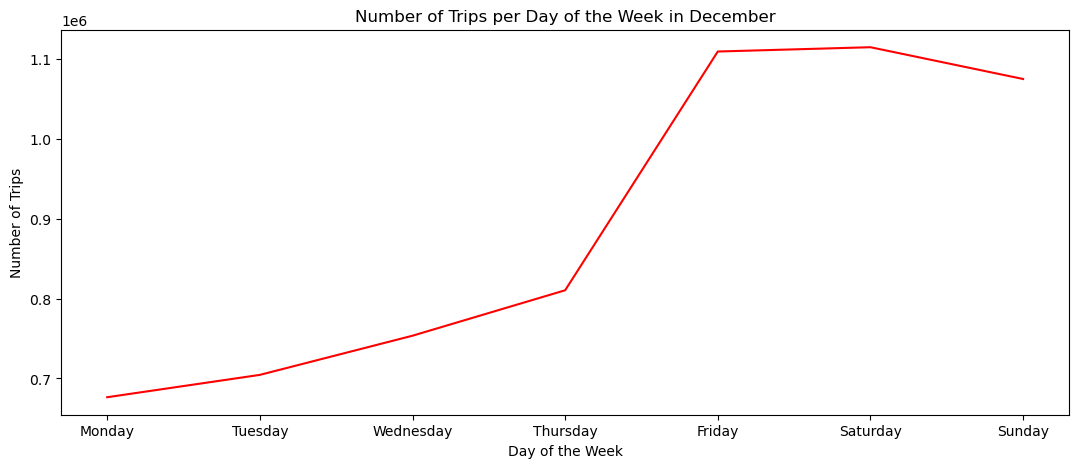

In [123]:
lyft_df.groupby(lyft_df.index.dayofweek)["trip_time"].count().plot(figsize=(13, 5), color="red")
plt.title("Number of Trips per Day of the Week in December")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

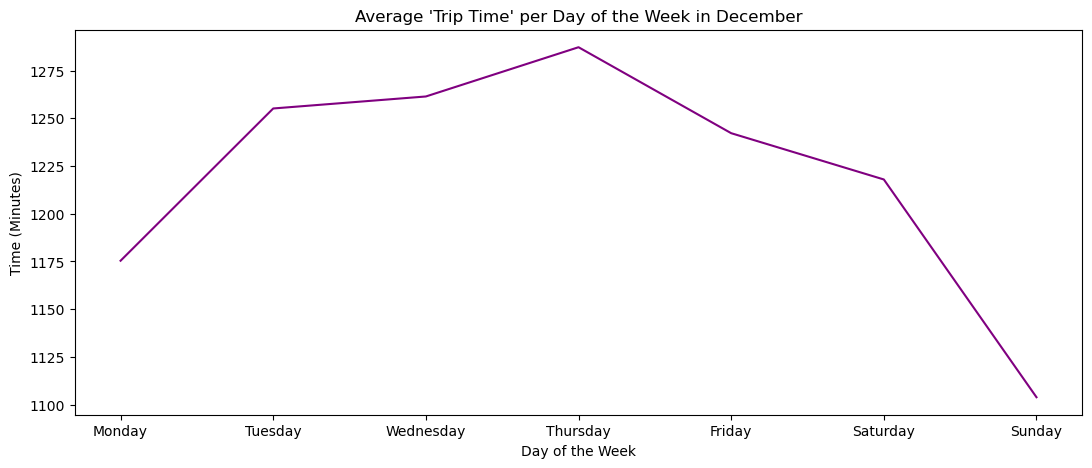

In [159]:
lyft_df.groupby(lyft_df.index.dayofweek)["trip_time"].mean().plot(figsize=(13, 5), color="purple")
plt.title("Average 'Trip Time' per Day of the Week in December")
plt.xlabel("Day of the Week")
plt.ylabel("Time (Minutes)")
plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

Text(0, 0.5, 'Miles')

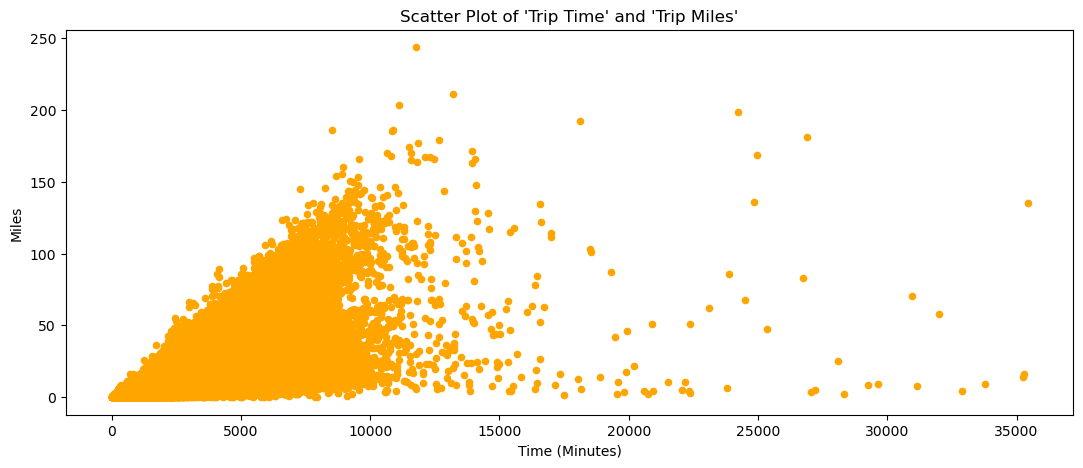

In [131]:
# scatter plot for trip time and trip miles
lyft_df.plot.scatter(x="trip_time", y="trip_miles", figsize=(13, 5), color="orange") 
plt.title("Scatter Plot of 'Trip Time' and 'Trip Miles'")
plt.xlabel("Time (Minutes)")
plt.ylabel("Miles")


In [84]:
# Read the taxi_zone_lookup.csv file into a DataFrame.
Taxi_Zone_Lookup_df = pd.read_csv("Resources/taxi_zone_lookup.csv")

# Display the first 10 rows of the DataFrame.
Taxi_Zone_Lookup_df.head(10)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [85]:
# merge the two dataframes based on pickup locations
lyft_PU_locations_df = pd.merge(lyft_df, Taxi_Zone_Lookup_df, left_on="PULocationID", right_on="LocationID")
lyft_PU_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost,LocationID,Borough,Zone,service_zone
0,2023-12-01 00:00:00,2023-12-01 00:25:06,130,216,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82,130,Queens,Jamaica,Boro Zone
1,2023-12-01 00:00:00,2023-12-01 00:25:31,170,61,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80,170,Manhattan,Murray Hill,Yellow Zone
2,2023-12-01 00:00:00,2023-12-01 01:05:08,158,265,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98,158,Manhattan,Meatpacking/West Village West,Yellow Zone
3,2023-12-01 00:00:01,2023-12-01 00:19:44,238,185,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71,238,Manhattan,Upper West Side North,Yellow Zone
4,2023-12-01 00:00:01,2023-12-01 00:22:25,216,61,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99,216,Queens,South Ozone Park,Boro Zone


In [86]:
# Rename the columns to match the schema
lyft_PU_locations_df.rename(columns={"Borough": "Pickup_Borough", "Zone": "Pickup_Zone"}, inplace=True)

# Drop the LocationID and service_zone columns
lyft_PU_locations_df = lyft_PU_locations_df.drop(columns=["LocationID", "service_zone"])

# Reorder the columns
lyft_PU_locations_df = lyft_PU_locations_df[["pickup_datetime", "dropoff_datetime", "PULocationID", "Pickup_Borough", "Pickup_Zone", "DOLocationID", "trip_miles", "trip_time", "base_passenger_fare", "tolls", "bcf", "sales_tax", "congestion_surcharge", "airport_fee", "tips", "driver_pay", "Total_Passenger_Cost"]]

# Display the first 5 rows of the DataFrame.
lyft_PU_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:00:00,2023-12-01 00:25:06,130,Queens,Jamaica,216,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
1,2023-12-01 00:00:00,2023-12-01 00:25:31,170,Manhattan,Murray Hill,61,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2,2023-12-01 00:00:00,2023-12-01 01:05:08,158,Manhattan,Meatpacking/West Village West,265,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
3,2023-12-01 00:00:01,2023-12-01 00:19:44,238,Manhattan,Upper West Side North,185,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
4,2023-12-01 00:00:01,2023-12-01 00:22:25,216,Queens,South Ozone Park,61,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


In [87]:
# merge  lyft_PU_locations_df with Taxi_Zone_Lookup_df based on drop-off locations
lyft_locations_df = pd.merge(lyft_PU_locations_df, Taxi_Zone_Lookup_df, left_on="DOLocationID", right_on="LocationID")
lyft_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost,LocationID,Borough,Zone,service_zone
0,2023-12-01 00:00:00,2023-12-01 00:25:06,130,Queens,Jamaica,216,3.882,1506,14.17,0.00,...,1.26,0.00,0.0,10.0,19.43,25.82,216,Queens,South Ozone Park,Boro Zone
1,2023-12-01 00:00:00,2023-12-01 00:25:31,170,Manhattan,Murray Hill,61,8.530,1531,37.25,2.24,...,3.48,2.75,0.0,0.0,25.80,46.80,61,Brooklyn,Crown Heights North,Boro Zone
2,2023-12-01 00:00:00,2023-12-01 01:05:08,158,Manhattan,Meatpacking/West Village West,265,18.970,3908,59.29,22.44,...,0.00,0.00,0.0,0.0,67.70,83.98,265,NaN,Outside of NYC,NaN
3,2023-12-01 00:00:01,2023-12-01 00:19:44,238,Manhattan,Upper West Side North,185,10.432,1183,28.39,0.24,...,2.54,2.75,0.0,0.0,25.00,34.71,185,Bronx,Pelham Parkway,Boro Zone
4,2023-12-01 00:00:01,2023-12-01 00:22:25,216,Queens,South Ozone Park,61,9.309,1344,29.56,0.00,...,2.62,0.00,0.0,0.0,25.05,32.99,61,Brooklyn,Crown Heights North,Boro Zone


In [88]:
# Rename the columns to match the schema
lyft_locations_df.rename(columns={"Borough": "Dropoff_Borough", "Zone": "Dropoff_Zone"}, inplace=True)

# Drop the LocationID and service_zone columns
lyft_locations_df = lyft_locations_df.drop(columns=["LocationID", "service_zone"])

# Reorder the columns
lyft_locations_df = lyft_locations_df[["pickup_datetime", "dropoff_datetime", "PULocationID", "Pickup_Borough", "Pickup_Zone", "DOLocationID", "Dropoff_Borough", "Dropoff_Zone", "trip_miles", "trip_time", "base_passenger_fare", "tolls", "bcf", "sales_tax", "congestion_surcharge", "airport_fee", "tips", "driver_pay", "Total_Passenger_Cost"]]

# Display the first 5 rows of the DataFrame.
lyft_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:00:00,2023-12-01 00:25:06,130,Queens,Jamaica,216,Queens,South Ozone Park,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
1,2023-12-01 00:00:00,2023-12-01 00:25:31,170,Manhattan,Murray Hill,61,Brooklyn,Crown Heights North,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2,2023-12-01 00:00:00,2023-12-01 01:05:08,158,Manhattan,Meatpacking/West Village West,265,NaN,Outside of NYC,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
3,2023-12-01 00:00:01,2023-12-01 00:19:44,238,Manhattan,Upper West Side North,185,Bronx,Pelham Parkway,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
4,2023-12-01 00:00:01,2023-12-01 00:22:25,216,Queens,South Ozone Park,61,Brooklyn,Crown Heights North,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


Text(0, 0.5, 'Number of Trips')

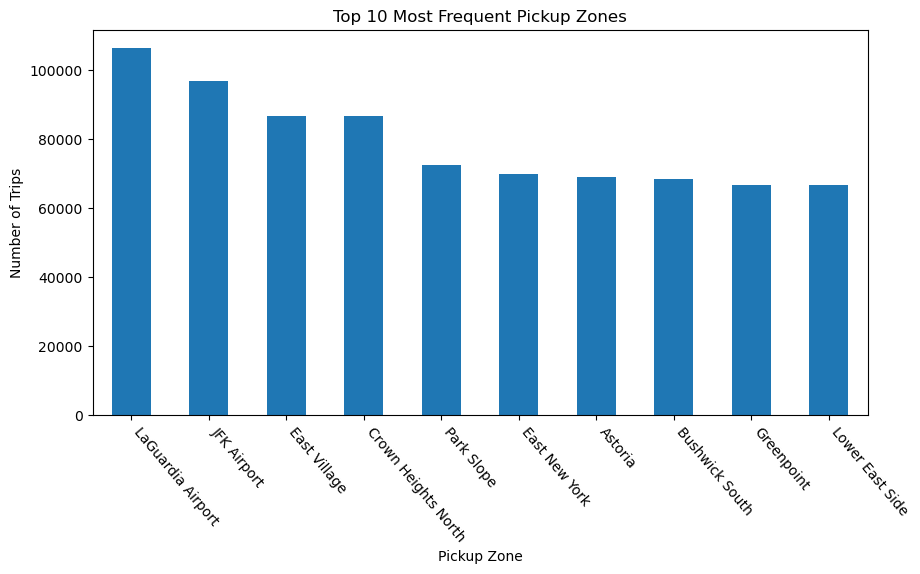

In [144]:
# Plot the top 10 most frequent pickup zones.
lyft_locations_df["Pickup_Zone"].value_counts().head(10).plot(kind="bar", title="Top 10 Most Frequent Pickup Zones", figsize=(10, 5))
plt.xticks(rotation=310, ha="left")
plt.xlabel("Pickup Zone")
plt.ylabel("Number of Trips")

Text(0, 0.5, 'Number of Trips')

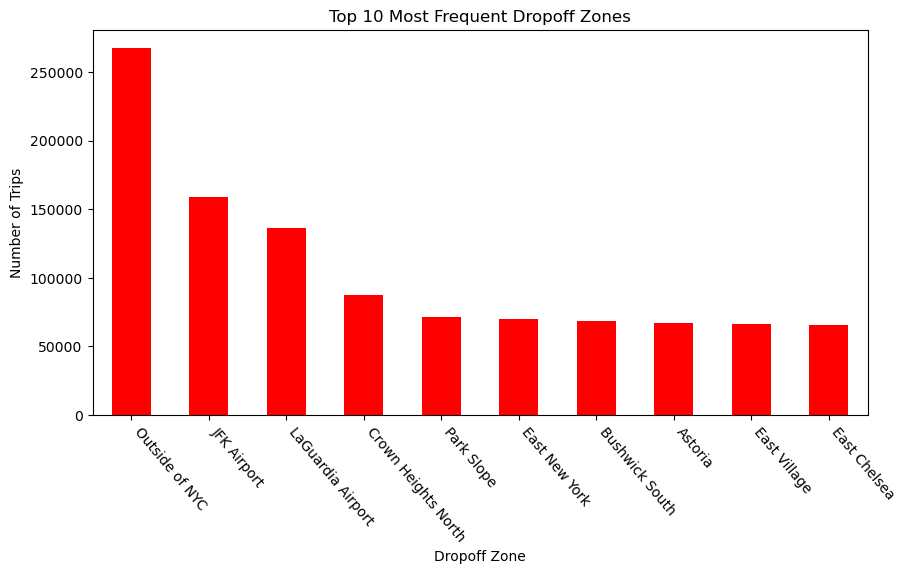

In [143]:
# Plot the top 10 most frequent dropoff zones.
lyft_locations_df["Dropoff_Zone"].value_counts().head(10).plot(kind="bar", title="Top 10 Most Frequent Dropoff Zones", figsize=(10, 5), color="red")
plt.xticks(rotation=310, ha="left")
plt.xlabel("Dropoff Zone")
plt.ylabel("Number of Trips")

Text(0.5, 0, '')

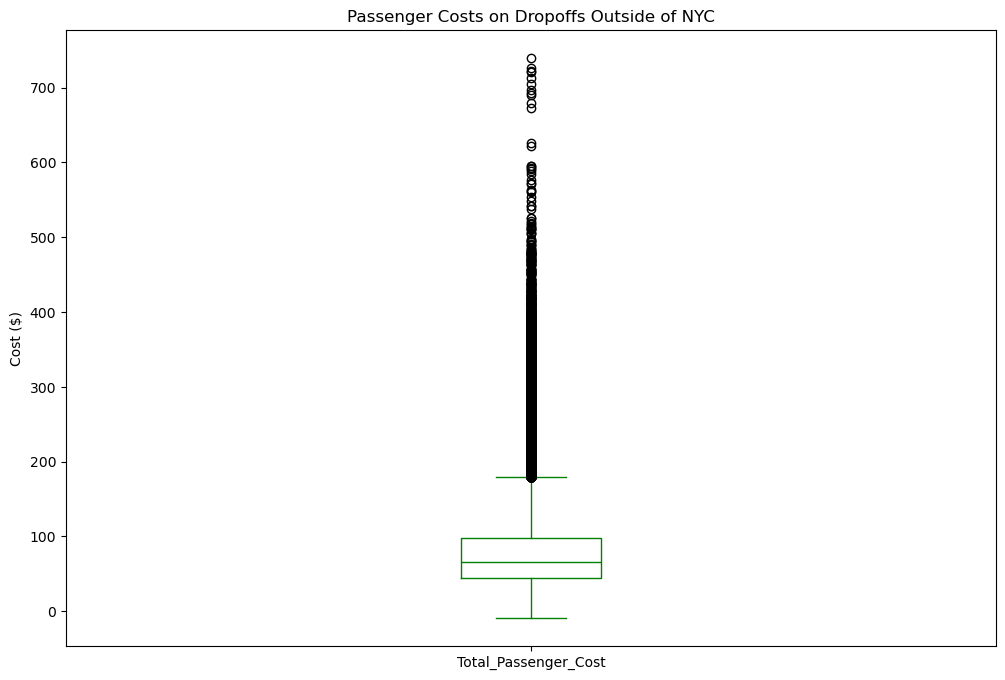

In [148]:
# Boxplot for passenger costs on dropoffs outside of NYC
lyft_locations_df[lyft_locations_df["Dropoff_Zone"] == "Outside of NYC"]["Total_Passenger_Cost"].plot(kind="box", figsize=(12, 8), color="green")   
plt.title("Passenger Costs on Dropoffs Outside of NYC")
plt.ylabel("Cost ($)")
plt.xlabel(None)

In [125]:
borough_pickup_costs = lyft_locations_df.groupby(["Pickup_Borough", "Pickup_Zone"])[["Total_Passenger_Cost"]].sum()
borough_pickup_costs = borough_pickup_costs.sort_values(by="Total_Passenger_Cost", ascending=False)
borough_pickup_costs.head(15)

Total_Passenger_Cost
Pickup_Borough Pickup_Zone                                    
Queens         JFK Airport                          7382022.21
               LaGuardia Airport                    6861180.72
Manhattan      Times Sq/Theatre District            2991382.42
               East Village                         2896479.89
               East Chelsea                         2701634.31
               Clinton East                         2687771.29
               Midtown South                        2518317.57
               Midtown Center                       2393392.32
               Lower East Side                      2249839.94
               TriBeCa/Civic Center                 2236553.98
               West Chelsea/Hudson Yards            2195931.31
Brooklyn       Park Slope                           2134009.40
Manhattan      Union Sq                             2097955.63
Brooklyn       Crown Heights North                  2080642.63
Manhattan      Murray Hill                          2001572.33

In [132]:
borough_dropoff_costs = lyft_locations_df.groupby(["Dropoff_Borough", "Dropoff_Zone"])[["Total_Passenger_Cost"]].sum()
borough_dropoff_costs = borough_dropoff_costs.sort_values(by="Total_Passenger_Cost", ascending=False)
borough_dropoff_costs.head(15)

Total_Passenger_Cost
Dropoff_Borough Dropoff_Zone                                   
Queens          JFK Airport                         10958802.68
                LaGuardia Airport                    7783771.11
EWR             Newark Airport                       4747150.37
Manhattan       East Chelsea                         2104562.95
                Midtown Center                       2064898.34
                Times Sq/Theatre District            2017512.48
Brooklyn        Crown Heights North                  1977292.95
                Park Slope                           1912173.39
Manhattan       East Village                         1788983.01
                Clinton East                         1706357.71
Brooklyn        Bushwick South                       1658325.99
                Greenpoint                           1641141.58
Manhattan       West Chelsea/Hudson Yards            1636194.84
                Midtown South                        1635093.09
Queens          Astoria                              1609877.68

Text(0, 0.5, 'Average Tip $')

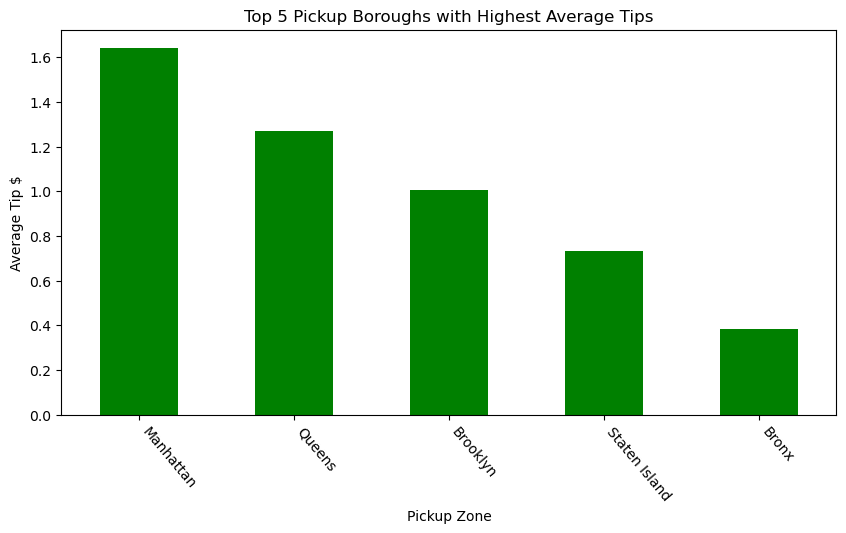

In [157]:
# Plot the top 5 highest average tip pickup borough.
lyft_locations_df.groupby(["Pickup_Borough"])["tips"].mean().sort_values(ascending=False).head(5).plot(kind="bar", title="Top 5 Pickup Boroughs with Highest Average Tips", figsize=(10, 5), color="green")
plt.xticks(rotation=310, ha="left")
plt.xlabel("Pickup Zone")
plt.ylabel("Average Tip $")


Text(0, 0.5, 'Average Driver Pay')

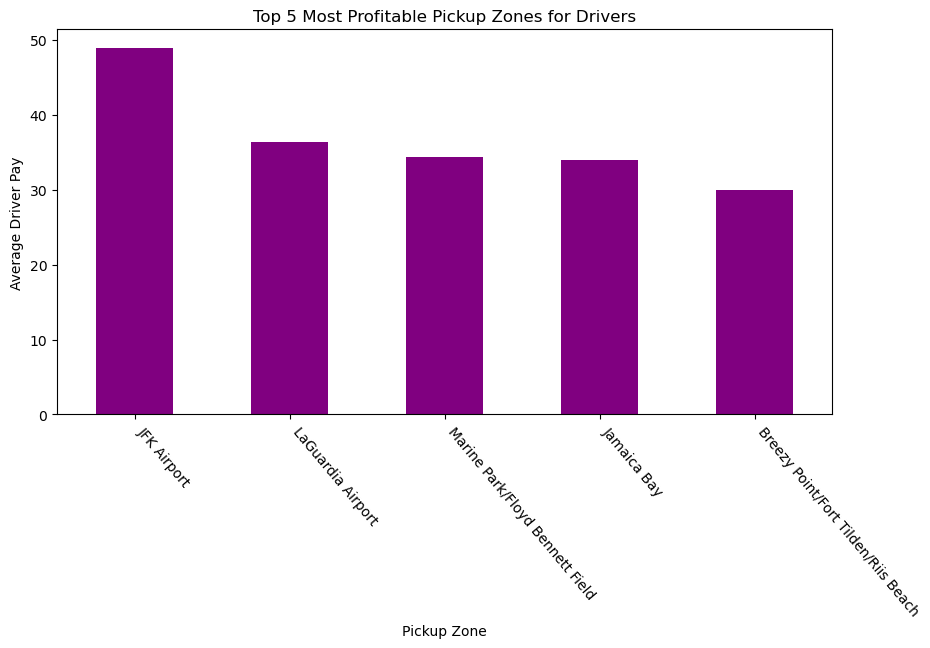

In [149]:
# Plot the top 5 most profitable pickup zones for drivers.
lyft_locations_df.groupby(["Pickup_Zone"])["driver_pay"].mean().sort_values(ascending=False).head(5).plot(kind="bar", title="Top 5 Most Profitable Pickup Zones for Drivers", figsize=(10, 5), color="purple")
plt.xticks(rotation=310, ha="left")
plt.xlabel("Pickup Zone")
plt.ylabel("Average Driver Pay")

In [138]:
# plot the most efficient trips (cost per mile)
lyft_locations_df["Cost_Per_Mile"] = lyft_locations_df["Total_Passenger_Cost"] / lyft_locations_df["trip_miles"]
efficient_lyfts_df = lyft_locations_df.loc[lyft_locations_df["Cost_Per_Mile"]>0].sort_values(by="Cost_Per_Mile", ascending=True)
efficient_lyfts_df.head(10)

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost,Cost_Per_Mile
6165921,2023-12-31 19:29:04,2024-01-01 02:12:54,217,Brooklyn,South Williamsburg,17,Brooklyn,Bedford,198.179,24230,4.69,0.0,0.13,0.42,2.75,0.0,0.0,337.50,7.99,0.040317
1480946,2023-12-08 10:35:00,2023-12-08 13:22:02,89,Brooklyn,Flatbush/Ditmas Park,265,NaN,Outside of NYC,139.621,10022,9.62,0.0,0.26,0.83,0.00,0.0,0.0,310.30,10.71,0.076708
5870317,2023-12-30 08:37:23,2023-12-30 10:58:32,61,Brooklyn,Crown Heights North,210,Brooklyn,Sheepshead Bay,113.457,8469,10.43,0.0,0.29,0.93,0.00,0.0,0.0,272.72,11.65,0.102682
5208564,2023-12-26 17:00:27,2023-12-26 19:27:39,244,Manhattan,Washington Heights South,11,Brooklyn,Bath Beach,91.916,8832,8.78,0.0,0.24,0.78,0.00,0.0,0.0,205.23,9.80,0.106619
5287149,2023-12-27 07:00:00,2023-12-27 09:06:33,77,Brooklyn,East New York/Pennsylvania Avenue,265,NaN,Outside of NYC,134.041,7593,16.09,0.0,0.45,1.45,0.00,0.0,0.0,279.49,17.99,0.134213
5917911,2023-12-30 14:49:09,2023-12-30 16:41:55,260,Queens,Woodside,260,Queens,Woodside,64.650,6766,8.06,0.0,0.22,0.71,0.00,0.0,0.0,149.61,8.99,0.139056
938141,2023-12-05 14:30:00,2023-12-05 19:06:59,149,Brooklyn,Madison,265,NaN,Outside of NYC,121.759,16619,17.19,0.0,0.47,0.00,0.00,0.0,0.0,352.32,17.66,0.145041
2312484,2023-12-12 12:34:10,2023-12-12 17:56:03,165,Brooklyn,Midwood,265,NaN,Outside of NYC,87.290,19313,12.54,0.0,0.34,1.11,0.00,0.0,0.0,319.18,13.99,0.160270
1263488,2023-12-07 08:45:37,2023-12-07 10:47:42,61,Brooklyn,Crown Heights North,61,Brooklyn,Crown Heights North,67.293,7325,10.43,0.0,0.29,0.93,0.00,0.0,0.0,158.41,11.65,0.173124
5336582,2023-12-27 13:32:20,2023-12-27 15:26:57,19,Queens,Bellerose,19,Queens,Bellerose,88.711,6877,14.99,0.0,0.40,1.30,0.00,0.0,0.0,182.43,16.69,0.188139


In [ ]:
# plot a multi-line graph of the top boroughs trips over time 
